Load the dataset

In [1]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("Lab 14\\Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

Here you have to clean and normalize the dataset and extract the relevant features

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


200


# Kmeans Algo

In [16]:
# The initial random centroids
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    print(indices)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        if sum(labels == i) > 0:
            centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

def compute_inertia(X, labels, centroids):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0: 
            inertia += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1)**2)
    return inertia

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    
    labels = assign_clusters(X, centroids)
    
    for i in range(max_iters):
        old_centroids = centroids.copy()
        centroids = update_centroids(X, labels, k)        
        labels = assign_clusters(X, centroids)
        if np.linalg.norm(centroids - old_centroids) < tol:
            break
    
    inertia = compute_inertia(X, labels, centroids)
    
    return labels, centroids, inertia


# Use the elbow method to find the optimal value of k and plot the elbow curve

[95]
[95 15]
[95 15 30]
[ 95  15  30 158]
[ 95  15  30 158 128]
[ 95  15  30 158 128 115]
[ 95  15  30 158 128 115  69]
[ 95  15  30 158 128 115  69 170]
[ 95  15  30 158 128 115  69 170 174]
[ 95  15  30 158 128 115  69 170 174  45]


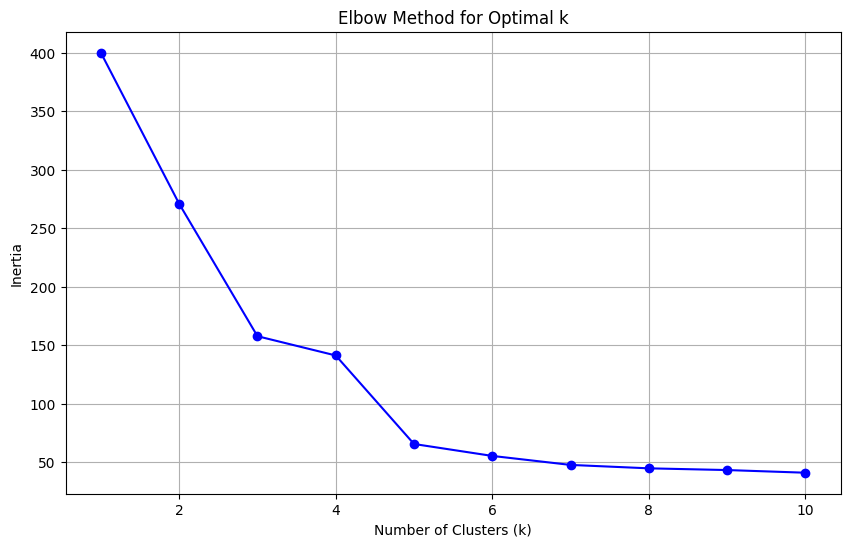

In [17]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    _, _, inertia = kmeans(X_scaled, k)
    inertias.append(inertia)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Final Clustering 

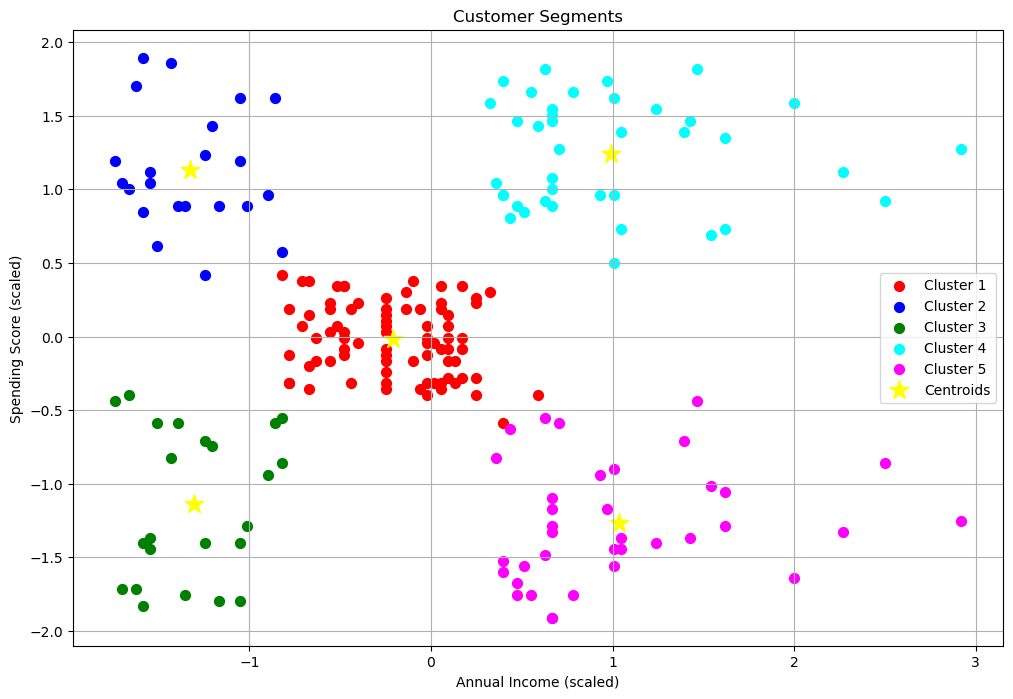

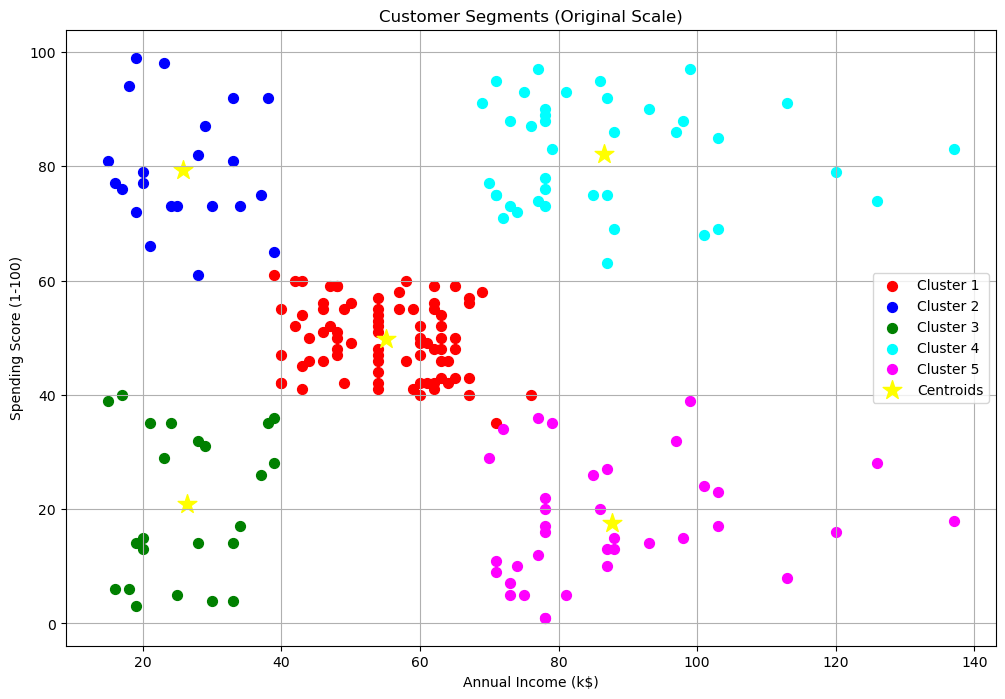

Cluster Analysis:
Cluster 1: 80 customers
  Average Income: $55.09k
  Average Spending Score: 49.71

Cluster 2: 22 customers
  Average Income: $25.73k
  Average Spending Score: 79.36

Cluster 3: 23 customers
  Average Income: $26.30k
  Average Spending Score: 20.91

Cluster 4: 39 customers
  Average Income: $86.54k
  Average Spending Score: 82.13

Cluster 5: 36 customers
  Average Income: $87.75k
  Average Spending Score: 17.58



In [18]:

k = 5
labels, centroids, _ = kmeans(X_scaled, k)

# Plot the final clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'black', 'brown']


for i in range(k):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], 
                s=50, c=colors[i % len(colors)], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='*', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], 
                s=50, c=colors[i % len(colors)], label=f'Cluster {i+1}')

centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=200, c='yellow', marker='*', label='Centroids')
plt.title('Customer Segments (Original Scale)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

cluster_details = []
for i in range(k):
    cluster_points = X[labels == i]
    avg_income = np.mean(cluster_points[:, 0])
    avg_spending = np.mean(cluster_points[:, 1])
    count = len(cluster_points)
    cluster_details.append({
        'Cluster': i+1,
        'Count': count,
        'Avg Income': avg_income,
        'Avg Spending': avg_spending
    })

print("Cluster Analysis:")
for cluster in cluster_details:
    print(f"Cluster {cluster['Cluster']}: {cluster['Count']} customers")
    print(f"  Average Income: ${cluster['Avg Income']:.2f}k")
    print(f"  Average Spending Score: {cluster['Avg Spending']:.2f}")
    print()



# Briefly discuss what each of the clusters represents and what insights can be gained for the marketing team from this

Putting value of k = 5 gives more optimal result.

Cluster 1 shows that there are 80 customres with average income and average spending which is most among any other cluster
    This will help them to give bugdet-friendly products.

Cluster 2 shows that there are 22 customers who have very low income but their spending is very high.
    This will give them membership, loyality programs for such customers.

Cluster 3 shows that there are 23 customers who have low income and their spending also low.
    This will help them getting discounts and free offers to get products.

Cluster 4 shows that there are 39 customers who have relatively high income and also their spending is high.
    This will give them purchase premium and VIP products.

Cluster 5 shows that there are 36 customers who have high income and their spending is low
    This will help them determining barriers to limit their spending on premium products